# Worksheet 19

Name:  
UID: 

### Topics

- Linear Model Evaluation

## Linear Model Evaluation

Notice that R^2 only increases with the number of explanatory variables used. Hence the need for an adjusted R^2 that penalizes for insignificant explanatory variables.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

SAMPLE_SIZE = 100
beta = [1, 5]
X = -10.0 + 10.0 * np.random.random(SAMPLE_SIZE)
Y = beta[0] + beta[1] * X + np.random.randn(SAMPLE_SIZE)

for i in range(1, 15):
    X_transform = PolynomialFeatures(degree=i, include_bias=False).fit_transform(X.reshape(-1, 1))
    model = LinearRegression()
    model.fit(X_transform, Y)
    print(model.score(X_transform, Y))

0.9958589643231597
0.9959097229402613
0.9959115268710306
0.9959906477400954
0.9960800636760958
0.99620484982512
0.9963190821235585
0.9963405096209165
0.9964643350895213
0.9964789742316903
0.9964796986375501
0.9964810265239712
0.9964815270618979
0.9964837923343165


a) Hypothesis Testing Sandbox (follow along in class) [Notes](https://medium.com/@gallettilance/hypothesis-testing-almost-everything-you-need-to-know-ce812ded50b)

0.31249999999999983
[1, 1, 0, 1, 1]
0.15625


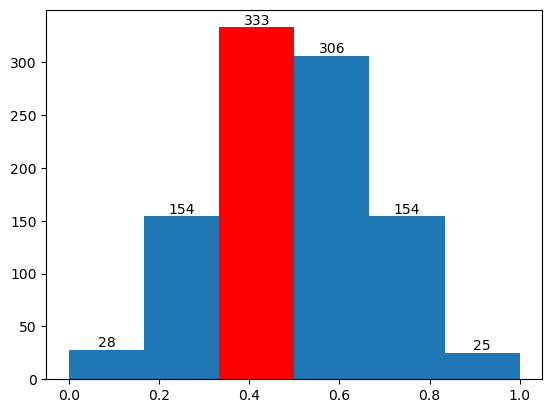

In [2]:
import numpy as np
from scipy.stats import binom
import matplotlib.pyplot as plt

flips = [1, 0, 0, 1, 0]

def num_successes(flips):
    return sum(flips)

print(binom.pmf(num_successes(flips), len(flips), 1/2))

SAMPLE_SIZE = 5
flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
print(flips)
print(binom.pmf(num_successes(flips), SAMPLE_SIZE, 1/2))

p_est = []

for _ in range(1000):
    flips = [np.random.choice([0, 1]) for _ in range(SAMPLE_SIZE)]
    p_est.append(sum(flips) / SAMPLE_SIZE)

fig, ax = plt.subplots()
_, bins, patches = ax.hist(p_est, bins=SAMPLE_SIZE + 1)
p = np.digitize([2/5], bins)
patches[p[0]-1].set_facecolor('r')
ax.bar_label(patches)
plt.show()

b) Plot a data set and fitted line through the point when there is no relationship between X and y.

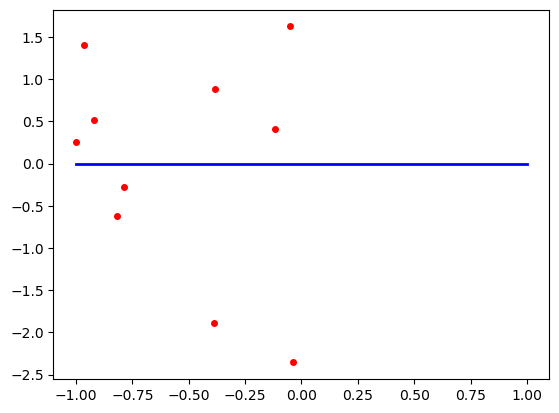

In [8]:
import numpy as np
import matplotlib.pyplot as plt


SAMPLE_SIZE = 10

xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
y = np.random.randn(SAMPLE_SIZE)

intercept = np.ones(np.shape(xlin)[0])
X = np.array([intercept, xlin]).T
beta = np.zeros(2)  # Slope is zero since there's no relationship between X and y

xplot = np.linspace(-1, 1, 20)

# Generate fitted values for each point in xplot
X_plot = np.array([np.ones_like(xplot), xplot]).T
yestplot = np.dot(X_plot, beta)

plt.plot(xplot, yestplot, 'b-', lw=2)
plt.plot(xlin, y, 'ro', markersize=4)
plt.show()

c) Using the above code, plot a histogram of the parameter estimates for the slope after generating `1000` independent datasets. Comment on what the plot means. Increase the sample size to see what happens to the plot. Explain.

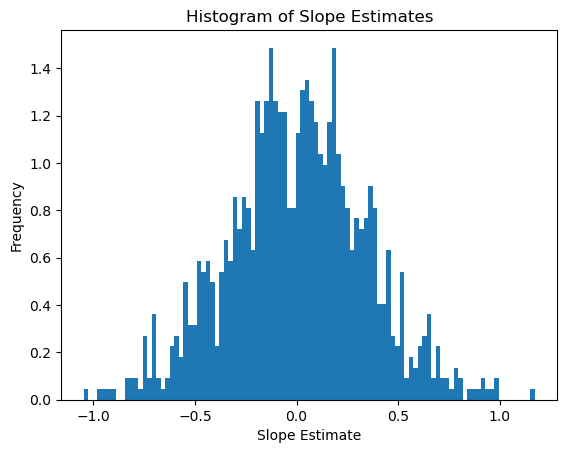

In [12]:

SAMPLE_SIZE = 100
NUM_SIMULATIONS = 1000
beta_hist = []

for _ in range(NUM_SIMULATIONS):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T

    # Estimate the parameters (intercept and slope)
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    # Collect the slope estimates
    beta_hist.append(beta[1])

# Plotting the histogram
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_xlabel('Slope Estimate')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Slope Estimates')
plt.show()

The higher the sample size gets the closer the distribution gets to a gaussian around 0.  Since a slope of zero means there is no relationship, this means that when you average all of the various random relationships together they average out to have 0 or no relationship

d) We know that:

$$\hat\beta-\beta \sim \mathcal{N}(0,\sigma^2 (X^TX)^{-1})$$

thus for each component $k$ of $\hat\beta$ (here there are only two - one slope and one intercept)

$$\hat\beta_k -\beta_k \sim \mathcal{N}(0, \sigma^2 S_{kk})$$

where $S_{kk}$ is the $k^\text{th}$ diagonal element of $(X^TX)^{-1}$. Thus, we know that 

$$z_k = \frac{\hat\beta_k -\beta_k}{\sqrt{\sigma^2 S_{kk}}} \sim \mathcal{N}(0,1)$$

Verify that this is the case through a simulation and compare it to the standard normal pdf by plotting it on top of the histogram.

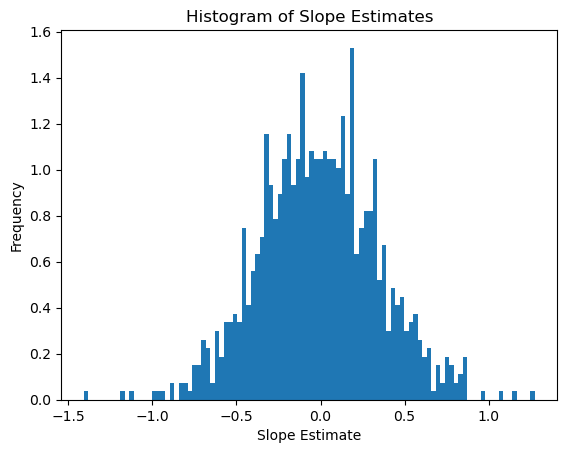

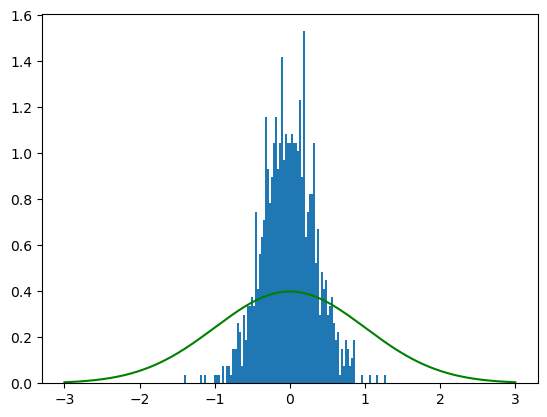

In [16]:
from scipy.stats import norm

beta_hist = []
for _ in range(1000):
    xlin = -1.0 + 1.0 * np.random.random(SAMPLE_SIZE)
    y = np.random.randn(SAMPLE_SIZE)

    intercept = np.ones(np.shape(xlin)[0])
    X = np.array([intercept, xlin]).T

    # Estimate the parameters (intercept and slope)
    beta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)

    # Collect the slope estimates
    beta_hist.append(beta[1])


fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.set_xlabel('Slope Estimate')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Slope Estimates')
plt.show()
xs = np.linspace(-3,3,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
xs = np.linspace(-3, 3, 1000)
ax.plot(xs, norm.pdf(xs), color='green')
plt.show()

e) Above we normalized $\hat\beta$ by subtracting the mean and dividing by the standard deviation. While we know that the estimate of beta is an unbiased estimator, we don't know the standard deviation. So in practice when doing a hypothesis test where we want to assume that $\beta = 0$, we can simply use $\hat\beta$ in the numerator. However we don't know the standard deviation and need to use an unbiased estimate of the standard deviation instead. This estimate is the standard error `s`

$$s = \sqrt{\frac{RSS}{n - p}}$$

where p is the number of parameters beta (here there are 2 - one slope and one intercept). This normalized $\hat\beta$ can be shown to follow a t-distribution with `n-p` degrees of freedom. Verify this is the case with a simulation.

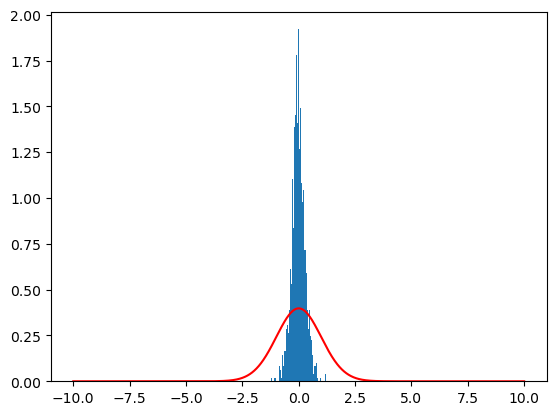

In [18]:
from scipy.stats import t

def standard_error(y_true, y_pred):
    residuals = y_true - y_pred
    RSS = np.sum(residuals ** 2)
    return np.sqrt(RSS / (len(y_true) - p))

beta_hist = []
for _ in range(1000):
    # Generate synthetic data
    epsilon = np.random.normal(scale=1, size=SAMPLE_SIZE)
    y = X @ beta + epsilon
    
    # Estimate coefficients
    beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y
    
    # Calculate standard error
    s = standard_error(y, X @ beta_hat)
    
    # Normalize beta_hat
    beta_normalized = beta_hat / s
    
    # Append normalized beta_hat to the list
    beta_hist.extend(beta_normalized)

xs = np.linspace(-10,10,1000)
fig, ax = plt.subplots()
ax.hist(beta_hist, bins=100, density=True)
ax.plot(xs, t.pdf(xs, SAMPLE_SIZE - 2), color='red')
plt.show()

f) You are given the following dataset:

In [20]:
import numpy as np
from scipy.stats import t

# Given data
x = np.array([-0.1920605, -0.11290798, -0.56434374, -0.67052057, -0.19233284, -0.42403586, -0.8114285, -0.38986946, -0.37384161, -0.50930229])
y = np.array([-0.34063108, -0.33409286, 0.34245857, 0.11062295, 0.76682389, 0.86592388, -1.68912015, -2.01463592, 1.61798563, 0.60557414])

# Add intercept to the design matrix
intercept = np.ones(np.shape(x)[0])
X = np.array([intercept, x]).T

# Estimate coefficients
beta_hat = np.linalg.inv(X.T @ X) @ X.T @ y

# Calculate residuals
residuals = y - X @ beta_hat

# Degrees of freedom
df = len(x) - 2  # df = n - p, where p is the number of predictors (including intercept)

# Standard error of the slope coefficient
s_slope = np.sqrt(np.sum(residuals ** 2) / df) / np.sqrt(np.sum((x - np.mean(x)) ** 2))

# t-statistic
t_statistic = beta_hat[1] / s_slope

# p-value
p_value = 2 * t.cdf(-np.abs(t_statistic), df)  

print("p-value:", p_value)


p-value: 0.5131420720905752


what is the probability of observing a dataset at least as extreme as the above assuming $\beta = 0$ ?

In [ ]:
p-value: 0.5131420720905752
